In [43]:
import tensorflow as tf
tf.__version__

'2.10.0'

In [44]:
layers = tf.keras.layers

### RNN 테스트를 위한 더미데이터 생성

In [45]:
inputs = tf.random.normal([2, 5, 4])

In [46]:
inputs # 2: batch size, 5: time step, 4: input dimension 
# 배치 시퀀스 데이타

<tf.Tensor: shape=(2, 5, 4), dtype=float32, numpy=
array([[[-1.3544159 ,  0.7045493 ,  0.03666191,  0.86918795],
        [ 0.43842277, -0.53439844, -0.07710292,  1.5658046 ],
        [-0.1012345 , -0.2744975 ,  1.420466  ,  1.2609465 ],
        [-0.4364091 , -1.963399  , -0.06452482, -1.056841  ],
        [ 1.0019135 ,  0.6735137 ,  0.06987705, -1.4077919 ]],

       [[ 1.0278524 ,  0.2797411 , -0.01347954,  1.8451811 ],
        [ 0.9706112 , -1.0242516 , -0.6544423 , -0.29738778],
        [-1.3240397 ,  0.28785658, -0.87579006, -0.08856997],
        [ 0.6921164 ,  0.842157  , -0.06378508,  0.9280078 ],
        [-0.6039788 , -0.17669262,  0.04221032,  0.29037958]]],
      dtype=float32)>

* tf.keras를 이용한 다양한 RNN layer를 구현해보자

## Multi-Layer RNN

![multilayer_rnn](https://user-images.githubusercontent.com/11681225/46912330-5fe5fd00-cfad-11e8-95c2-94bb8e7b1bf6.png)

In [47]:
model = tf.keras.Sequential()

In [48]:
# model.add(layers.GRU(1, return_sequences=True)) # 2, 5, 4 -> 2, 5, 1
# model.add(layers.GRU(1, return_sequences=True)) # 2, 1
# model.add(layers.GRU(1, return_sequences=False)) # 2, 1을 입력값을 받을 수 없다
model.add(layers.LSTM(4, return_sequences=True)) # 2, 5, 4 -> 2, 5, 1
model.add(layers.LSTM(4, return_sequences=False)) # 첫번째 패러미터는 output dimension 두번째 패러미터는 return_sequences

In [49]:
model(inputs)

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[ 0.02839978,  0.0610898 ,  0.03506647,  0.00490953],
       [-0.00571496,  0.02157206,  0.02385934, -0.01698093]],
      dtype=float32)>

In [50]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (2, 5, 4)                 144       
                                                                 
 lstm_17 (LSTM)              (2, 4)                    144       
                                                                 
Total params: 288
Trainable params: 288
Non-trainable params: 0
_________________________________________________________________


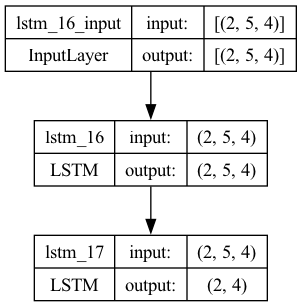

In [51]:
tf.keras.utils.plot_model(model, show_shapes=True)


## Bi-directional RNN

![bidirectional_rnn](https://user-images.githubusercontent.com/11681225/46912324-3d53e400-cfad-11e8-8b09-85d8ebdb0e66.png)

In [52]:
model = tf.keras.Sequential()

In [53]:
model.add(layers.Bidirectional(layers.LSTM(1, return_sequences=True)))
model.add(layers.Bidirectional(layers.LSTM(1, return_sequences=True)))
model.add(layers.Bidirectional(layers.LSTM(1)))

In [54]:
model(inputs)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-0.0250258 ,  0.13888897],
       [-0.01231779,  0.1491712 ]], dtype=float32)>

In [55]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_9 (Bidirectio  (2, 5, 2)                48        
 nal)                                                            
                                                                 
 bidirectional_10 (Bidirecti  (2, 5, 2)                32        
 onal)                                                           
                                                                 
 bidirectional_11 (Bidirecti  (2, 2)                   32        
 onal)                                                           
                                                                 
Total params: 112
Trainable params: 112
Non-trainable params: 0
_________________________________________________________________
